# Trabalho Cálculo Numérico em Computadores 2024.1

# Tarefa 1

Implementar um método de Newton que utilize o método de Horner para avaliar os polinômios p(x) e p'(x). Use o polinômio p(x)= x^4 - 3x^3 + x^2 + x + 1 para testar o algoritmo, aproximando as duas raízes reais. Para isolar as raízes reais, faça um gráfico de p(x) e faça uma escolha para xo.

In [1]:
import matplotlib.pyplot as plt
from pylab import arange

In [2]:
# Criando a função utilizada para plotar o gráfico
def p_graph(x):
    return (x**4.0) + ((-3.0)*(x**3.0)) + (x**2.0) + x + 1.0

Com isso agora iremos plotar um gráfico de p(x) para definirmos manualmente um x0 para a método de newton

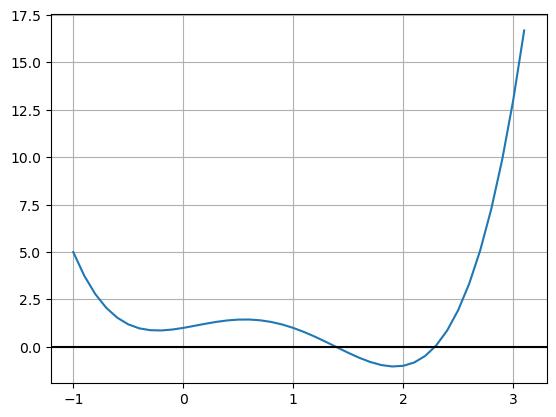

In [3]:
# Definindo Intervalo para o gráfico inicial
x_graph= arange(-1,3.1 + 0.1, 0.1)
y_graph = p_graph(x_graph)
# Plotando o Grafico de p(x)
fig, ax = plt.subplots()
ax.plot(x_graph,y_graph, label="p(x)")
ax.grid(True)
ax.axhline(y=0, color='k')

Observamos pelo comportamento do gráfico que temos duas raízes, sendo bastante próximas de 1.5 e 2.5

Aplicamos então o método de Newton nestes dois pontos a fim de obtermos as aproximações destas raízes

In [4]:
def newton_method(a:list, x:float, e:int, max_iter=50):
    """ Função do Método de Newton:
        a - list: lista de coeficientes [a0, a1, ..., an]
        x - float: valor inicial de x para a aproximação
        e - int: valor do expoente de epsilon (epsilon = 10**e)
    """
    # Pegando o grau do polinomio
    n = len(a)-1
    
    # Definindo o valor de epsilon
    epsilon = 10.0**e
    
    # Print de tabela
    print("k\t\tx\t\tp(x)")
    
    
    # Iteração
    for k in range(0,max_iter+1):
        
        # Realizando o método de Horner para polinômios
        b = a[n]
        c = b
        # b -> resultado do polinômio; 
        # c -> resultado da derivada do polinômio;
        for j in range(n-1, 0, -1):
            b = a[j] + b*x
            c = b + c*x
            
        b = a[0] + b*x
        
        # Verificando epsilon
        if abs(b) <= epsilon:
            print("Aproximação menor que epsilon!")
            print("\nx\t\tp(x)")
            print("%e\t%e" %(x, b))
            return x
        
        # Realiza o método de Newton
        x = x - b/c
        
        # Printando os valores calulados na tabela
        print("%d\t\t%e\t%e" %(k, x, b))
        
    print("Iterações máxima atingidas")
    return x

Definimos neste caso, x0 como 1.5

In [5]:
a = [1, 1, 1, -3, 1]
x = 1.5
e = -14
x = newton_method(a, x, e)

k		x		p(x)
0		1.386364e+00	-3.125000e-01
1		1.389390e+00	8.677739e-03
2		1.389391e+00	5.723007e-07
Aproximação menor que epsilon!

x		p(x)
1.389391e+00	2.886580e-15


Definimos neste caso, x0 como 2.5

In [6]:
a = [1, 1, 1, -3, 1]
x = 2.5
e = -14
x = newton_method(a, x, e)

k		x		p(x)
0		2.341837e+00	1.937500e+00
1		2.293361e+00	3.731798e-01
2		2.288833e+00	2.942626e-02
3		2.288795e+00	2.437381e-04
4		2.288795e+00	1.720841e-08
Aproximação menor que epsilon!

x		p(x)
2.288795e+00	1.110223e-15


Assumimos então que as raízes aproximadas do polinômio p(x) são: x1 = 1.389390683334933 e x2 = 2.2887949921884863

# Tarefa 2
Implementar o método de Muller. Utilizando o polinômio 
p(x) = x^4 - 3x^3 + x^2 + x + 1
para testar o algoritmo. Aproxime as raízes reais, com base nos intervalos obtidos anteriormente. Aproxima uma das raízes complexas usando x0 = -0.5, x1 = 0, x2 = 0.5.

Criamos então duas funções, uma para a obtenção da raíz complexa pertencente a R (conjunto dos Reais) e outra pertencente a I (conjunto dos Imaginarios).

In [10]:
from math import sqrt
from sympy import Symbol
from cmath import sqrt

# Definindo o polinômio/função
x = Symbol('x')
f = (x**4) + ((-3)*(x**3)) + (x**2) + x + 1



def metodo_muller_n_imaginario(x0:float, x1:float, x2:float, e:int, max_iter:int=50):
    """ Realiza o método de Muller em um polinômio/função
        x0 - float = x0
        x1 - float = x1
        x2 - float = x2
        e - int = valor do expoente de epsilon (epsilon = 10**e)
        max_iter - int = valor máximo de iterações
    """
    # Printando cabeçalho da tabela
    print("i\t\tx3")
    epsilon = 10**e
        
    for i in range(max_iter):
        f0 = (f.subs(x, x0) - f.subs(x, x2))/(x0 - x2)
        f1 = (f.subs(x, x1) - f.subs(x, x2))/(x1 - x2)

        a = (f0 - f1)/(x0 - x1)
        b = f0*((x2 - x1)/(x0 - x1)) + f1*((x0 - x2)/(x0 - x1))
        c = f.subs(x, x2)

        x3 = complex(x2 + (-2*c) / (b + (b/(abs(b)))*sqrt(((b**2)-(4*a*c)))))
        
        # Printando valores na tabela
        print(f"{i}\t\t{x3}")
        
        x0 = x1
        x1 = x2
        x2 = x3
        
        if abs(complex(f.subs(x, x3))) < epsilon:
            print("Aproximação menor que epsilon!")
            print(f"\nx3 = {x3}")
            break

        if i == max_iter - 1:
            print('limite de iteração atingido')
            break


# Função dos raizes Reais
def metodo_muller_n_real(x0:float, x1:float, x2:float, e:int, max_iter:int=50):
    """ Realiza o método de Muller em um polinômio/função
        x0 - float = x0
        x1 - float = x1
        x2 - float = x2
        e - int = valor do expoente de epsilon (epsilon = 10**e)
        max_iter - int = valor máximo de iterações
    """
    # Printando cabeçalho da tabela
    print("i\t\tx3")
    epsilon = 10**e

    for i in range(max_iter):
        # Realizando o Método de Muller
        f0 = (f.subs(x, x0) - f.subs(x, x2))/(x0 - x2)
        f1 = (f.subs(x, x1) - f.subs(x, x2))/(x1 - x2)

        a = (f0 - f1)/(x0 - x1)
        b = f0*((x2 - x1)/(x0 - x1)) + f1*((x0 - x2)/(x0 - x1))
        c = f.subs(x, x2)

        x3 = x2 + (-2*c)/(b - sqrt(abs((b**2)-(4*a*c))))

        # Printando valores na tabela
        print("%d\t\t%e" %(i, x3))

        x0 = x1
        x1 = x2
        x2 = x3
    
        # Verificando se menor que epsilon
        if abs(f.subs(x, x3)) < epsilon:
            print("Aproximação menor que epsilon!")
            print(f"\nx3 = {x3}")
            break

        # Maximo de iterações
        if i == max_iter - 1:
            print('Limite de iteração atingido')
            break

Agora aplicamos o método com x0 = -0.5, x1 = 0, x2 = 0.5, buscando inicialmente uma raíz real

In [11]:
x0 = -0.5
x1 = 0.0
x2 = 0.5
e1 = -14
metodo_muller_n_real(x0, x1, x2, e1)

i		x3
0		4.481726e+00
1		-1.146013e-01
2		1.184349e-01
3		1.039799e+00
4		1.570827e+00
5		1.419401e+00
6		1.387687e+00
7		1.389382e+00
8		1.389391e+00
9		1.389391e+00
Aproximação menor que epsilon!

x3 = 1.38939068333493


Agora fazemos o método buscando uma raíz complexa

In [14]:
metodo_muller_n_imaginario(x0, x1, x2, -3)

i		x3
0		(-0.10000000000000009+0.8888194417315589j)
1		(-0.3022174694574372+0.23685182024043608j)
2		(-0.28864432744375107+0.4136959941926853j)
3		(-0.3273677898530688+0.47380243390754506j)
4		(-0.3561227945953467+0.45269684754851436j)
5		(-0.3430148874290938+0.4356459071915529j)
6		(-0.3317798457848226+0.4438308513932646j)
7		(-0.337284915637814+0.4513606624209448j)
8		(-0.3421232776814748+0.44775491181198684j)
9		(-0.33982197201432274+0.4446669244054706j)
10		(-0.3378151653460123+0.44614971902341904j)
11		(-0.33878179450832874+0.4474576069902385j)
12		(-0.33962780056261355+0.4468301507846253j)
13		(-0.3392224402815952+0.44628356431336247j)
14		(-0.33886818311251443+0.4465458989756853j)
15		(-0.33903830015578074+0.44677561730796195j)
Aproximação menor que epsilon!

x3 = (-0.33903830015578074+0.44677561730796195j)


Temos então que uma das raizes complexas de p(x) é x1 = (-0.33903830015578074+0.44677561730796195j)